<a href="https://colab.research.google.com/github/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/blob/master/Updated_notebook_Team_ss1_JHB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Context" data-toc-modified-id="Context-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Context</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Data-sets" data-toc-modified-id="Data-sets-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data sets</a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Variable-definitions" data-toc-modified-id="Variable-definitions-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Variable definitions</a></span></li><li><span><a href="#The-data-input-files-we-have-used-for-our-model-are:" data-toc-modified-id="The-data-input-files-we-have-used-for-our-model-are:-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>The data input files we have used for our model are:</a></span></li></ul></li></ul></li><li><span><a href="#Initial-Data-Exploration" data-toc-modified--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Data Exploration</a></span><ul class="toc-item"><li><span><a href="#Import-packages-and-load-data-files" data-toc-modified-id="Import-packages-and-load-data-files-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import packages and load data files</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Missing Values</a></span></li></ul></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Insights" data-toc-modified-id="Insights-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Insights</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Initial-model-evaluation" data-toc-modified-id="Initial-model-evaluation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Initial model evaluation</a></span></li><li><span><a href="#Further-Feature-Extraction" data-toc-modified-id="Further-Feature-Extraction-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Further Feature Extraction</a></span></li></ul></li><li><span><a href="#Predictive-Modelling" data-toc-modified-id="Predictive-Modelling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predictive Modelling</a></span><ul class="toc-item"><li><span><a href="#An-Overview-of-learners" data-toc-modified-id="An-Overview-of-learners-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>An Overview of learners</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#K-Nearest-Neighbours" data-toc-modified-id="K-Nearest-Neighbours-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>K-Nearest Neighbours</a></span></li><li><span><a href="#Support-Vector-Machines" data-toc-modified-id="Support-Vector-Machines-5.1.3"><span class="toc-item-num">5.1.3&nbsp;&nbsp;</span>Support Vector Machines</a></span></li><li><span><a href="#Naïve-Bayes" data-toc-modified-id="Naïve-Bayes-5.1.4"><span class="toc-item-num">5.1.4&nbsp;&nbsp;</span>Naïve Bayes</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-5.1.5"><span class="toc-item-num">5.1.5&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-5.1.6"><span class="toc-item-num">5.1.6&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#An-Overview-of-the-features" data-toc-modified-id="An-Overview-of-the-features-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>An Overview of the features</a></span></li><li><span><a href="#An-explanation-of-Pipelines" data-toc-modified-id="An-explanation-of-Pipelines-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>An explanation of Pipelines</a></span></li><li><span><a href="#Build-a-pipeline-to-vectorize-the-data,-then-train-and-fit-a-model" data-toc-modified-id="Build-a-pipeline-to-vectorize-the-data,-then-train-and-fit-a-model-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Build a pipeline to vectorize the data, then train and fit a model</a></span></li><li><span><a href="#Run-predictions-and-analyze-the-results" data-toc-modified-id="Run-predictions-and-analyze-the-results-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Run predictions and analyze the results</a></span></li></ul></li><li><span><a href="#Feature-Selection-and-Model-Selection" data-toc-modified-id="Feature-Selection-and-Model-Selection-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Selection and Model Selection</a></span><ul class="toc-item"><li><span><a href="#Hyperparameter-tuning" data-toc-modified-id="Hyperparameter-tuning-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Hyperparameter tuning</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Model Evaluation</a></span></li></ul></li><li><span><a href="#Summary-of-Conclusions" data-toc-modified-id="Summary-of-Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary of Conclusions</a></span><ul class="toc-item"><li><span><a href="#Data-Exploration" data-toc-modified-id="Data-Exploration-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Data Exploration</a></span></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Exploratory data analysis</a></span></li><li><span><a href="#Predictive-modelling" data-toc-modified-id="Predictive-modelling-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Predictive modelling</a></span></li><li><span><a href="#Feature-selection" data-toc-modified-id="Feature-selection-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Feature selection</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Recommendations</a></span></li><li><span><a href="#Key-takeaways" data-toc-modified-id="Key-takeaways-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Key takeaways</a></span></li></ul></li></ul></div>

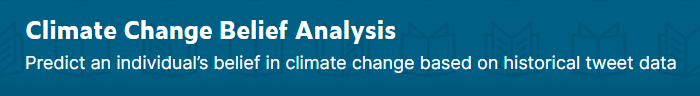

# 1. Introduction

## 1.1 Context

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

## 1.2 Problem Statement

With this context, we are being challenged with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

Our quest is to provide valuable sentiment analysis information with actionable insights that can be used for an entity that  could like its brand to be viewed as "eco-friendly" from the perspective of all its stakeeholders e.g. clients, employeers, investors etc.


## 1.3 Data Description

### 1.3.1 Data

The collection of this data which we use as our data source was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes in the table below:

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2205222%2F8e4d65f2029797e0462b52022451829c%2Fdata.PNG?generation=1590752860255531&amp;alt=media" alt="" title="">

### 1.3.2 Variable definitions

*   sentiment: Sentiment of tweet

*   message: Tweet body

*   tweetid: Twitter unique id


### 1.3.3 The data input files we have used for our model are:

*   Train.csv (is the dataset that we will use to train to our model) as denoted by the "train_data" dataframe variable in our code.
*   Test.csv (is the dataset on which we will apply to our model to) as denoted by the "test_data" dataframe variable in our code.
*   SampleSubmission.csv (is an example of what our submission file will look like. The order of the rows is not so relevant, but the names of the tweetid's must be correct.)

# 2. Download, import packages and load data files 

###### Task: Download and install external libraries/packages


### 2.1 Install relevant libraries

We start off by importing relevant packages and loading the data.

`Comet:`for viewing different versions of your machinle learning model results - `pip install comet_ml--3.1.11`

`Enoji:` for removing emojis - `pip install emoji--0.5.4`

`Wordcloud:`for creating a word cloud infographic to visualise frequent words used in text - `pip install wordcloud --1.7.0`

`Textblob:`for simple, Pythonic text processing. Sentiment analysis, part-of-speech tagging, noun phrase parsing, and more - `pip install textblob--0.15.3` 

`Natural Language Toolkit (NLTK):`for common natural language processing (NLP) tasks and more - `pip install nltk--3.4.5`

`Spacy:`for industrial strength language processing (NLP) tasks and more - `pip install spacy--2.2.4`

`Tensorflow:`or for high performance machine learning numerical computation - `pip install tensorflow--2.2.0`

In [1]:
# Install relevant external libraries
!pip install comet_ml
!pip install emoji
!pip install wordcloud
!pip install textblob
!pip install nltk
!pip install spacy
!pip install tensorflow

     |████████████████████████████████| 215kB 8.3MB/s 
     |████████████████████████████████| 204kB 18.6MB/s 
     |████████████████████████████████| 419kB 22.5MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34546 sha256=bdf3394b266a6d94e6310df348139dc686f1d86f8ba8a32be9abd174b74cdc83
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj
     |████████████████████████████████| 51kB 3.1MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=192d7c0906623a55f6d018878e355c37a8e91eeb4f7ab5817f8ce4ccc536de69
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


MessageError: ignored

In [ ]:
# Import packages needed to solve the problem

# Data analysis and wrangling
import pandas as pd
import numpy as np
from tqdm import tqdm

# General natural language and text processing tools
import re
import string
import emoji
import gensim
import spacy
import sklearn.feature_extraction.text
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import defaultdict
from collections import  Counter

# Enhanced natural language and text processing tools
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

# Processing data to prior to trainig and fitting to model
from sklearn.model_selection import train_test_split

# Stemming/lemmatizing/vectorizing
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

# Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Set plot style for data visualisation
sns.set()
# for improved aesthetics
plt.style.use('ggplot')    

# Importing wordcloud for plotting word clouds and 
from wordcloud import WordCloud
# textwrap for wrapping longer text
from textwrap import wrap

# Machine Learning model versioning
from comet_ml import Experiment

# Machine learning model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report

# Ignore warnings because they are annoying
import warnings
warnings.filterwarnings('ignore')

### 2.2 Import Data

In [ ]:
# Load train data
train_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/train.csv')

In [ ]:
# Load test data
test_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/test.csv')

In [ ]:
# Load sample data
sample_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/sample_submission.csv')


###### **Task: View sample of train and test data**
Simply displaying the train and test data.

In [ ]:
# Print train_data
print('Train data rows and columns:')
train_data.sample(10)

In [ ]:
# Print test_data
print('Test data rows and columns:')
test_data.sample(10)

###### **Task: Display the shape of train and test data**


In [ ]:
print('Train data rows and columns:', train_data.shape)
print('Test data rows and columns:', test_data.shape)
print('Sample data rows and columns:', sample_data.shape)

###### **Task: Investigate the label column.**
After loading and viewing the shape (i.e. how many rows and columns exist in our dataset) of our data we now take a cursory view of the target variable that we ultimately need to predict. In our initial data exploration we will take a brief look at the proportionality of data to see whether it is balanced or not. In the real world, text data is rarely balanced so we expect to see imbalanced proportionality between the four class labels associated with the target variable that we aim to predict. 

In [ ]:
# View all the class labels for the target variable
train_data['sentiment'].unique()

In [ ]:
# View the breakdown of the different class labels
train_data['sentiment'].value_counts()

# 3. Initial Data Exporation Analysis








###### **Task: Check the proportionality of the class labels to see if data is indeed imbalanced.**

Check class label proportion for:

* **Anti:** the tweet does not believe in man-made climate change (**class =  -1**)

* **Neutral:** the tweet neither supports nor refutes the belief of man-mad climate change (**class =  0**)

* **Pro:** the tweet supports the belief of man-made climate change (**class = 1**)

* **News:** the tweet links to factual news about climate change (**class = 2**)

In [ ]:
# Calculate class label proportions
anti_class_proportion = len(train_data.loc[train_data['sentiment']== -1]) / len(train_data)
neut_class_proportion = len(train_data.loc[train_data['sentiment']==0]) / len(train_data)
pro_class_proportion = len(train_data.loc[train_data['sentiment']==1]) / len(train_data)
news_class_proportion = len(train_data.loc[train_data['sentiment']==2]) / len(train_data)

# View class label proportions

print("Anti class proportion: -1 =", anti_class_proportion)
print("Neutral class proportion: 0 =",neut_class_proportion)
print("Pro class proportion: 1 =",pro_class_proportion)
print("News class proportion: 2 =",news_class_proportion)

##ROUND THE PROPORTIONS TO 2 DECIMALS AND LABEL THEM ##BILE

###### **Task: Check that the sum of all class label proportions are equal to 1**

In [ ]:
# Calculate and confirm that the above proportions are in fact equal to 1 (or 100%)
total_class = anti_class_proportion + neut_class_proportion + pro_class_proportion + news_class_proportion
total_class == 1

In [ ]:
# Set figure size for ditribution of class imbalance
fig, ax = plt.subplots(figsize = (10, 5))

# Create ditribution bar graph 
graph = sns.countplot(x = 'sentiment', data = train_data)

# Give title and plot
plt.title('Distribution of Classification Groups')
plt.xlabel('Sentiment class labels')
plt.ylabel('Number of tweets')
plt.show(graph)

## summary of findings ## NONDU

In [ ]:
import matplotlib.pyplot as plt

# To view proportions of the class labels its best practice to us pie charts
# Where the slices will be ordered and plotted counter-clockwise:
labels = 'Anti', 'Neutral', 'Pro', 'News'
sizes = [anti_class_proportion, neut_class_proportion, pro_class_proportion, news_class_proportion]
explode = (0, 0, 0.1, 0)  # Only "explode" the 3rd slice (i.e. 'Anti')

# Create pie chart with the above labels and calculated class proportions as inputs
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## NDU TO ADD COMMENTS ON CODE

###3.1 Text Preprocessing

#### Missing Values

Missing values are a common attribute in datasets and for a number of different reasons. In this part of the notebook we will do a minimal assessment of missing values. It is important however that we understand missingness from both the perspective of the train_data and test_data. As such we want to see which columns have missing data in both the train and test datasets as well as the proportion of missingness in each of those columns.

###### **Task: Check for missing values**

In [ ]:
# View missing values for train data
train_data.isnull().sum()

###### **Task: Check for whitespace strings**

In [ ]:
blanks = []  # start with an empty list

for i,lb,msg,tid in train_data.itertuples():  # iterate over the DataFrame
    if type(msg)==str:            # avoid NaN values
        if msg.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
        
print(len(blanks), 'blanks: ', blanks)

###### **task: Check for possible duplicate tweets/retweets**

<img data-attachment-id="1700" data-permalink="https://tomraftery.com/2011/06/01/my-twitter-magic-number-is-16-whats-yours/screen-shot-2011-06-01-at-20-25-36/" data-orig-file="https://i2.wp.com/tomraftery.com/wp-content/uploads/2011/06/screen-shot-2011-06-01-at-20-25-36.png?fit=563%2C271&amp;ssl=1" data-orig-size="563,271" data-comments-opened="1" data-image-meta="{&quot;aperture&quot;:&quot;0&quot;,&quot;credit&quot;:&quot;&quot;,&quot;camera&quot;:&quot;&quot;,&quot;caption&quot;:&quot;&quot;,&quot;created_timestamp&quot;:&quot;0&quot;,&quot;copyright&quot;:&quot;&quot;,&quot;focal_length&quot;:&quot;0&quot;,&quot;iso&quot;:&quot;0&quot;,&quot;shutter_speed&quot;:&quot;0&quot;,&quot;title&quot;:&quot;&quot;}" data-image-title="Twitter post" data-image-description="<p>Twitter post staying under my Twitter magic number</p>
" data-medium-file="https://i2.wp.com/tomraftery.com/wp-content/uploads/2011/06/screen-shot-2011-06-01-at-20-25-36.png?fit=300%2C144&amp;ssl=1" data-large-file="https://i2.wp.com/tomraftery.com/wp-content/uploads/2011/06/screen-shot-2011-06-01-at-20-25-36.png?fit=563%2C271&amp;ssl=1" class="size-full wp-image-1700 jetpack-lazy-image jetpack-lazy-image--handled" title="Twitter post" src="https://i0.wp.com/www.enterpriseirregulars.com/wp-content/uploads/2011/06/a06675977df79f3e834fdf758225008f1.png?resize=563%2C271&amp;ssl=1" alt="Twitter post" width="563" height="271" data-recalc-dims="1" data-lazy-loaded="1">

<p>Twitter is a superb medium for getting a message out.</p>

<p>And it’s RT (Retweet) convention means that tweets can go viral very quickly. So this may give us an indication of virality and sentiment for certain classes of tweets as there are a number of RT's visible in our data. But how many are there? and for which sentiment classes?</p>

In [ ]:
# Check for duplicate messages/tweets in the train data
dups_train = train_data['message']
dups_train = train_data[dups_train.isin(dups_train[dups_train.duplicated()])].sort_values("message")
# Check for duplicate tweet ID's in the train data to validate that each message is unique
dups_tweet_tr = train_data['tweetid']
train_data[dups_tweet_tr.isin(dups_tweet_tr[dups_tweet_tr.duplicated()])].sort_values("message")
# Check for duplicate messages/tweets in the test data
dups_test = test_data['message']
dups_test = test_data[dups_test.isin(dups_test[dups_test.duplicated()])].sort_values("message")
# Check for duplicate tweet ID's in the test data to validate that each message is unique
dups_tweet_te = train_data['tweetid']
train_data[dups_tweet_te.isin(dups_tweet_te[dups_tweet_te.duplicated()])].sort_values("message")

print('Duplicate tweet messages in train data rows and columns:',dups_train.shape)
print('Duplicate tweet messages in test data rows and columns:',dups_test.shape)

In [ ]:
#Confirm whether sample of duplicates in train data is generally comprised of retweets
dups_train.sample(10)

In [ ]:
#Confirm whether sample of duplicates in test data is generally comprised of retweets
dups_test.sample(10)

In [ ]:
# View the differences in proportions of duplicates across train and test datasets
dups_train_prop = len(dups_train)/len(train_data['message'])
dups_test_prop = len(dups_test)/len(test_data['message'])
print('Train data proportion of duplicates/RTs:',round((dups_train_prop),2))
print('Test data proportion of duplicates/RTs:',round((dups_test_prop),2))

12 per cent of our train data contains duplicates and 11% of our test data contains duplicates. The propotion of duplicate messages across both data sets is similar.

## SUMMARISE INITIAL FINDING  

**Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations")**

****After pefroming  EDA on the given data the following observations were made:
 1 (pro)   8530
 2 (News)  3640
 0 (Neutral)  2353
-1 (Anti)   1296****

***this suggests that over 60% of the tweets are in support of man-made climate change while 20% were neutral, we can assume(hypothesis) that a positive change can be made as there are more pro sentiments than anti and a 50% chance of influencing the neutral sentiments to pro sentiments***



## EXPLAIN ALL THE STEPS OF CODE # NDU

######In the next several tasks we will take a first iteration taking a very manual text preprocessing approach to text cleaning which works but is imperfect in order to show that text cleaning in NLP can be an iterative process which is defined by the context of data you need for the machine learning problem you are solving for. Here we show a step by step approach of some of the text cleaning tools available to us. 

Further down in the notebook we take a more simplified approach once we understand the steps involved and how each step modifies our data so that it is ready for some more data exploration and is useable for our prediction model for this particular problem which relates to multiclass classification for those who believe and don't believe that climate change exists.

###### **task: review sample of uncleaned tweets**

In [ ]:
train_data['message'].unique()

In [ ]:
# try removing non-ASCII strings as a start e.g. byÃ¢â‚¬Â¦
train_data['message']=train_data['message'].apply(lambda x: x.split('Ã¢â‚¬Â¦')[0])

In [ ]:
train_data['message'].unique()

In [ ]:
# remove URL's
train_data['message']=train_data['message'].apply(lambda x: re.sub(r"\bhttps://t.co/\w+", '', x))

In [ ]:
train_data['message'].unique()

In [ ]:
# line breaks
train_data['message']=train_data['message'].replace('\n', ' ')

In [ ]:
train_data['message'].unique()

In [ ]:
# remove numbers
train_data['message']=train_data['message'].apply(lambda x: re.sub('\w*\d\w*', ' ', x))

In [ ]:
train_data['message'].unique()

In [ ]:
# remove capital letters and punctuations

train_data['message']=train_data['message'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [ ]:
train_data['message'].unique()

In [ ]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have", "it's": "it is" ,
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have", "we’ ve": "we have", "imvotingbecause": "i am voting because", "rt": "" }

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
train_data['message']=train_data['message'].apply(lambda x:expand_contractions(x))

In [ ]:
train_data['message'].unique()

In [ ]:
train_data['message']=train_data['message'].apply(lambda x: x.lower())

In [ ]:
train_data['message'].unique()

In [ ]:
train_data['message']=train_data['message'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [ ]:
train_data['message'].unique()

In [ ]:
# remove punctuations

train_data['message']=train_data['message'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

In [ ]:
train_data['message'].unique()

In [ ]:
# remove extra spaces
train_data['message']=train_data['message'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
train_data['message'].unique()

In [ ]:
train_data.head()

In [ ]:
# Function to remove emojis
!pip install emoji
import emoji
import string

def give_emoji_free_text(text):
    
    '''
    Takes in tweet series, removes all emojis, and returns cleaned tweet series.
    '''
    
    allchars = [str for str in text]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])

    return clean_text

In [ ]:
full_text_list = []

for index, rows in train_data['message'].iteritems():
    rows = give_emoji_free_text(rows) # remove emojis
    full_text_list.append(rows)
    
train_data['message'] = full_text_list

In [ ]:
train_data['message'].unique()

In [ ]:
# try removing non-ASCII strings as a start e.g. iã¢â‚¬â¦
train_data['message']=train_data['message'].apply(lambda x: x.split('iã¢â‚¬â¦')[0])

In [ ]:
for index,text in enumerate(train_data['message'][35:40]):
  print('Message %d:\n'%(index+1),text)

In [ ]:
train_data.to_csv('new train.csv', index=False)

In [ ]:
df = pd.read_csv('new train.csv')

In [ ]:
df

###### **task: lemmatization**

In [ ]:
# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [ ]:
# tokenization

In [ ]:
# Lemmatization with stopwords removal
train_data['lemmatized']=train_data['lemmatized']=train_data['message'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
train_data['lemmatized']

In [ ]:
train_data_grouped=train_data[['message','lemmatized']].groupby(by='message').agg(lambda x:' '.join(x))
train_data_grouped.head()

In [ ]:
#train_data.drop('message', axis=1, inplace=True)

In [ ]:
train_data.head()

In [ ]:
train_data['lemmatized'].unique()

In [ ]:
for index,text in enumerate(train_data['lemmatized'][35:40]):
  print('Lemmatized Message %d:\n'%(index+1),text)

###### **task: Document Term Matrix**

In [ ]:
# Creating Document Term Matrix
token = RegexpTokenizer(r'[@a-zA-Z0-9]+')
cv=CountVectorizer(analyzer='word',lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts=cv.fit_transform(train_data['lemmatized'])
df_dtm = pd.DataFrame(text_counts.toarray(), columns=cv.get_feature_names())
df_dtm.index=train_data['lemmatized'].index
df_dtm.sample(10)

# 4. Further Exploratory Data Analysis

In [ ]:
# load train data
train_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/train.csv')

In [ ]:
# load test data
test_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/test.csv')
print('Test data rows and columns:')

In [ ]:
# load sample data
sample_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/sample_submission.csv')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

%matplotlib inline

#this is just cool
from tqdm import tqdm

#visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')   #for optimum aesthetics 
import seaborn as sns

#natural language processing
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
import spacy

#stemming/lemmatizing/vectorizing
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

#processing
from sklearn.model_selection import train_test_split

#ignore warnings because they are annoying
import warnings
warnings.filterwarnings('ignore')

from nltk.util import ngrams
from collections import defaultdict
from collections import  Counter
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

**Task: Visualize current state of data**

In [ ]:
def get_top_tweet_bigrams(corpus, n=None): ##NDU CHANGE 
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

## COMMENT ON THE DIAGRAM BEFORE THE CLUSTERING. GIVE DETAILED STORY 
## NDU AND VICKY

In [ ]:
## NDU CHANGE
#Initial minimally cleaned text for top 20 unigram count
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(train_data['message'])[:20]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [ ]:
#Initial minimally cleaned text for top 20 bigram count
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(train_data['message'])[:20]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [ ]:
#create column for the number of words in tweet
train_data['word_count'] = train_data['message'].apply(lambda x: len(x.split()))

#split so we can use updated train set with new feature
train_data = train_data[:len(train_data)]

#define subplot to see graphs side by side
fig, ax = plt.subplots(figsize = (10, 5))

#create graphs
sns.kdeplot(train_data['word_count'][train_data['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(train_data['word_count'][train_data['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(train_data['word_count'][train_data['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(train_data['word_count'][train_data['sentiment'] == -1], shade = True, label = 'Anti')

#set title and plot
plt.title('Distribution of Tweet Word Count')
plt.xlabel('Word Count')
plt.ylabel('Sentiments Proportions')
plt.show()

In [ ]:
#create column for the number of characters in a tweet
train_data['character_count'] = train_data['message'].apply(lambda x: len(x))

#split so we can use updated train set with new feature
train_data = train_data[:len(train_data)]

#define subplot to see graphs side by side
fig, ax = plt.subplots(figsize = (10, 5))

#create graphs
sns.kdeplot(train_data['character_count'][train_data['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(train_data['character_count'][train_data['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(train_data['character_count'][train_data['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(train_data['character_count'][train_data['sentiment'] == -1], shade = True, label = 'Anti')


#set title and plot
plt.title('Distribution of Tweet Character Count')
plt.xlabel('Character Count')
plt.ylabel('Sentiment Probability')
plt.show()

In [ ]:
#define function to find average word length 
def average_word_length(x):
    x = x.split()
    return np.mean([len(i) for i in x])

#broadcast to text column
train_data['average_word_length'] = train_data['message'].apply(average_word_length)

#split so we can use updated train set with new feature
train_data = train_data[:len(train_data)]

#define subplot to see graphs side by side
fig, ax = plt.subplots(figsize = (10, 5))

#create graphs
sns.kdeplot(train_data['average_word_length'][train_data['sentiment'] == 0], shade = True, label = 'Neutral')
sns.kdeplot(train_data['average_word_length'][train_data['sentiment'] == 1], shade = True, label = 'Pro')
sns.kdeplot(train_data['average_word_length'][train_data['sentiment'] == 2], shade = True, label = 'News')
sns.kdeplot(train_data['average_word_length'][train_data['sentiment'] == -1], shade = True, label = 'Anti')

#set title
plt.title('Distribution of Tweet Average Word Length')
plt.xlabel('Average Word Length')
plt.ylabel('Sentiment Probability')

#splot graphs
plt.show()

xxxxx

## 4.1 Insights    ##NDUDUZO

##### Analysing the  `label` column in relation to text data
xxxxxx

##### Conclude
By now, we should be so much more familiar with the data. GOOD! Let's go a little further with Exploratory Data Analysis (EDA) withing our initial Feature Engineering/Extraction steps that are to follow. Now that we have an idea of what new features to construct and how they might be useful, let's add the rest of them and visualize them.

# 5. Feature Engineering

In [ ]:
# load train data
train_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/train.csv')

In [ ]:
# load test data
test_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/test.csv')
print('Test data rows and columns:')

In [ ]:
# load sample data
sample_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/sample_submission.csv')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

%matplotlib inline

#this is just cool
from tqdm import tqdm

#visualization
import matplotlib.pyplot as plt
plt.style.use('ggplot')   #for optimum aesthetics 
import seaborn as sns

#natural language processing
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import gensim
import spacy

#stemming/lemmatizing/vectorizing
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer

#processing
from sklearn.model_selection import train_test_split

#ignore warnings because they are annoying
import warnings
warnings.filterwarnings('ignore')

from nltk.util import ngrams
from collections import defaultdict
from collections import  Counter
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

###### **Task: Generate new features and visualise**

In [ ]:
#add unique word count
train_data['unique_word_count'] = train_data['message'].apply(lambda x: len(set(x.split())))

#add stopword count
stopwords = stopwords.words('english')
train_data['stopword_count'] = train_data['message'].apply(lambda x: len([i for i in x.lower().split() if i in stopwords]))

#add url count
train_data['url_count'] = train_data['message'].apply(lambda x: len([i for i in x.lower().split() if 'http' in i or 'https' in i]))

# add hashtag_count
train_data['hashtag_count'] = train_data['message'].apply(lambda x: len([c for c in str(x) if c == '#']))

#add mention count
train_data['mention_count'] = train_data['message'].apply(lambda x: len([i for i in str(x) if i == '@']))

#add punctuation count
train_data['punctuation_count'] = train_data['message'].apply(lambda x: len([i for i in str(x) if i in string.punctuation]))

#split so we can use updated train set
train_data = train_data[:len(train_data)]

disaster = train_data['sentiment'].astype(int) == 1

#produce graphs to visualize newly added features
fig, axes = plt.subplots(6, figsize=(20, 30))

graph1 = sns.kdeplot(train_data.loc[~disaster]['unique_word_count'], shade = True, label = 'Neutral', ax=axes[0])
graph1 = sns.kdeplot(train_data.loc[disaster]['unique_word_count'], shade = True, label = 'Pro', ax=axes[0])
graph1 = sns.kdeplot(train_data.loc[disaster]['unique_word_count'], shade = True, label = 'News', ax=axes[0])
graph1 = sns.kdeplot(train_data.loc[disaster]['unique_word_count'], shade = True, label = 'Anti', ax=axes[0])
graph1.set_title('Distribution of Unique Word Count')
# plt.xlabel('unique_word_count')

graph2 = sns.kdeplot(train_data.loc[~disaster]['stopword_count'], shade = True, label = 'Neutral', ax=axes[1])
graph2 = sns.kdeplot(train_data.loc[disaster]['stopword_count'], shade = True, label = 'Pro', ax=axes[1])
graph2 = sns.kdeplot(train_data.loc[disaster]['stopword_count'], shade = True, label = 'News', ax=axes[1])
graph2 = sns.kdeplot(train_data.loc[disaster]['stopword_count'], shade = True, label = 'Anti', ax=axes[1])
graph2.set_title('Distribution of Stopword Word Count')

graph3 = sns.kdeplot(train_data.loc[~disaster]['url_count'], shade = True, label = 'Neutral', ax=axes[2])
graph3 = sns.kdeplot(train_data.loc[disaster]['url_count'], shade = True, label = 'Pro', ax=axes[2])
graph3 = sns.kdeplot(train_data.loc[disaster]['url_count'], shade = True, label = 'News', ax=axes[2])
graph3 = sns.kdeplot(train_data.loc[disaster]['url_count'], shade = True, label = 'Anti', ax=axes[2])
graph3.set_title('Distribution of URL Count')

graph4 = sns.kdeplot(train_data.loc[~disaster]['hashtag_count'], shade = True,  label = 'Neutral', ax=axes[3], bw = 1)
graph4 = sns.kdeplot(train_data.loc[disaster]['hashtag_count'], shade = True, label = 'Pro', ax=axes[3], bw =1)
graph4 = sns.kdeplot(train_data.loc[disaster]['hashtag_count'], shade = True, label = 'News', ax=axes[3], bw =1)
graph4 = sns.kdeplot(train_data.loc[disaster]['hashtag_count'], shade = True, label = 'Anti', ax=axes[3], bw =1)
graph4.set_title('Distribution of Hashtag Count')

graph4 = sns.kdeplot(train_data.loc[~disaster]['mention_count'], shade = True,  label = 'Neutral', ax=axes[4], bw = 1)
graph4 = sns.kdeplot(train_data.loc[disaster]['mention_count'], shade = True, label = 'Pro', ax=axes[4], bw =1)
graph4 = sns.kdeplot(train_data.loc[disaster]['mention_count'], shade = True, label = 'News', ax=axes[4], bw =1)
graph4 = sns.kdeplot(train_data.loc[disaster]['mention_count'], shade = True, label = 'Anti', ax=axes[4], bw =1)
graph4.set_title('Distribution of Mention Count')

graph5 = sns.kdeplot(train_data.loc[~disaster]['punctuation_count'], shade = True, label = 'Neutral', ax=axes[5], bw = 1)
graph5 = sns.kdeplot(train_data.loc[disaster]['punctuation_count'], shade = True, label = 'Pro', ax=axes[5], bw = 1)
graph5 = sns.kdeplot(train_data.loc[disaster]['punctuation_count'], shade = True, label = 'News', ax=axes[5], bw = 1)
graph5 = sns.kdeplot(train_data.loc[disaster]['punctuation_count'], shade = True, label = 'Anti', ax=axes[5], bw = 1)
graph5.set_title('Distribution of Punctuation Count')

fig.tight_layout()
plt.show()

In [ ]:
train_data

### 5.1 Further Pre-Processing
* Data Cleaning
* Using NLP

Now that we have explored our data, we need to prepare it for machine learning. In general, to process text we need to apply the following procedure:

raw text corpus -> processing text -> tokenized text -> corpus vocabulary -> text representation

We can do most of the hard work with Keras's Tokenize object, which automatically converts all words to lowercase and filters out punctuation

This tokenizer has many arguements that allow you to do most of the cleaning with one line of code, so we do not need to much processing ourselves. I have included some examples of how one would manually clean text for reference:

### Create preprocessing functions

In [ ]:
#remove punctuation
def remove_punctuation(message):
    return message.translate(str.maketrans('', '', string.punctuation))

#remove stopwords
StopWords = stopwords
def remove_stopwords(message):
    return ' '.join([i for i in message.split() if i not in StopWords])

#remove words less than 4 
def remove_less_than(message):
    return ' '.join([i for i in message.split() if len(i) > 3])

#remove words with non-alphabet characters
def remove_non_alphabet(message):
    return ' '.join([i for i in message.split() if i.isalpha() == True])

#stem words
stemmer = SnowballStemmer('english')
def stem_words(message):
    return stemmer.stem(message)

#lemmatize words for verb
lemmatizer = WordNetLemmatizer()
def lemmatize_words_verb(message):
    return lemmatizer.lemmatize(message, 'v')

In [ ]:
from keras.preprocessing.text import Tokenizer #in contrast to RegExTokenizer from nltk libarary

contractions = ["can't stop won't stop"]

tokenizer = Tokenizer(filters= "'!#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n")
tokenizer.fit_on_texts(contractions)
tokenizer.word_index

In [ ]:
def correct_contraction(message):
    message = str(message).lower()
    message = re.sub(r"he's", "he is", message)
    message = re.sub(r"there's", "there is", message)
    message = re.sub(r"We're", "We are", message)
    message = re.sub(r"That's", "That is", message)
    message = re.sub(r"won't", "will not", message)
    message = re.sub(r"they're", "they are", message)
    message = re.sub(r"Can't", "Cannot", message)
    message = re.sub(r"wasn't", "was not", message)
    message = re.sub(r"aren't", "are not", message)
    message = re.sub(r"isn't", "is not", message)
    message = re.sub(r"What's", "What is", message)
    message = re.sub(r"i'd", "I would", message)
    message = re.sub(r"should've", "should have", message)
    message = re.sub(r"where's", "where is", message)
    message = re.sub(r"we'd", "we would", message)
    message = re.sub(r"i'll", "I will", message)
    message = re.sub(r"weren't", "were not", message)
    message = re.sub(r"They're", "They are", message)
    message = re.sub(r"let's", "let us", message)
    message = re.sub(r"it's", "it is", message)
    message = re.sub(r"can't", "cannot", message)
    message = re.sub(r"don't", "do not", message)
    message = re.sub(r"you're", "you are", message)
    message = re.sub(r"i've", "I have", message)
    message = re.sub(r"that's", "that is", message)
    message = re.sub(r"i'll", "I will", message)
    message = re.sub(r"doesn't", "does not", message)
    message = re.sub(r"i'd", "I would", message)
    message = re.sub(r"didn't", "did not", message)
    message = re.sub(r"ain't", "am not", message)
    message = re.sub(r"you'll", "you will", message)
    message = re.sub(r"I've", "I have", message)
    message = re.sub(r"Don't", "do not", message)
    message = re.sub(r"I'll", "I will", message)
    message = re.sub(r"I'd", "I would", message)
    message = re.sub(r"Let's", "Let us", message)
    message = re.sub(r"you'd", "You would", message)
    message = re.sub(r"It's", "It is", message)
    message = re.sub(r"Ain't", "am not", message)
    message = re.sub(r"Haven't", "Have not", message)
    message = re.sub(r"Could've", "Could have", message)
    message = re.sub(r"youve", "you have", message)
    message = re.sub(r"haven't", "have not", message)
    message = re.sub(r"hasn't", "has not", message)
    message = re.sub(r"There's", "There is", message)
    message = re.sub(r"He's", "He is", message)
    message = re.sub(r"It's", "It is", message)
    message = re.sub(r"You're", "You are", message)
    message = re.sub(r"I'M", "I am", message)
    message = re.sub(r"shouldn't", "should not", message)
    message = re.sub(r"wouldn't", "would not", message)
    message = re.sub(r"i'm", "I am", message)
    message = re.sub(r"I'm", "I am", message)
    message = re.sub(r"Isn't", "is not", message)
    message = re.sub(r"Here's", "Here is", message)
    message = re.sub(r"you've", "you have", message)
    message = re.sub(r"we're", "we are", message)
    message = re.sub(r"what's", "what is", message)
    message = re.sub(r"couldn't", "could not", message)
    message = re.sub(r"we've", "we have", message)
    message = re.sub(r"who's", "who is", message)
    message = re.sub(r"y'all", "you all", message)
    message = re.sub(r"would've", "would have", message)
    message = re.sub(r"it'll", "it will", message)
    message = re.sub(r"we'll", "we will", message)
    message = re.sub(r"We've", "We have", message)
    message = re.sub(r"he'll", "he will", message)
    message = re.sub(r"Y'all", "You all", message)
    message = re.sub(r"Weren't", "Were not", message)
    message = re.sub(r"Didn't", "Did not", message)
    message = re.sub(r"they'll", "they will", message)
    message = re.sub(r"they'd", "they would", message)
    message = re.sub(r"DON'T", "DO NOT", message)
    message = re.sub(r"they've", "they have", message)
    
    #correct some acronyms while we are at it
    message = re.sub(r"nba", "National Basketball Association", message)
    message = re.sub(r"azwx", "Arizona Weather", message)  
    message = re.sub(r"alwx", "Alabama Weather", message)
    message = re.sub(r"wordpressdotcom", "wordpress", message)      
    message = re.sub(r"gawx", "Georgia Weather", message)  
    message = re.sub(r"scwx", "South Carolina Weather", message)  
    message = re.sub(r"cawx", "California Weather", message)
    message = re.sub(r"usNWSgov", "United States National Weather Service", message) 
    message = re.sub(r"epa", "Environmental Protection Agency", message)
    message = re.sub(r"okwx", "Oklahoma City Weather", message)
    message = re.sub(r"rt", "retweet", message)
    message = re.sub(r"ny", "New York", message)
    message = re.sub(r"arwx", "Arkansas Weather", message)  
  
    
    return message

train_data['message'] = train_data['message'].apply(correct_contraction)

In [ ]:
train_data['message']

### Remove URL

In [ ]:
example = "My Profile: https://auth.geeksforgeeks.org\
/ user / Chinmoy % 20Lenka / articles in\
the portal of http://www.geeksforgeeks.org/"

In [ ]:
def remove_URL(message):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',message)

remove_URL(example)

In [ ]:
train_data['message']=train_data['message'].apply(lambda x : remove_URL(x))

### Remove line breaks

In [ ]:
example = "Hello \n World"

In [ ]:
print (example)

In [ ]:
def line_break(message):
    break_line = message.replace('\n', ' ')
    return break_line

line_break(example)

In [ ]:
train_data['message']=train_data['message'].apply(lambda x : remove_URL(x))

### Remove HTML

In [ ]:
example = """<div>
<h1>Reel or Real</h1>
<p>Hindustan </p>
<a href="https://www.hindustan.com/c/nlp-open-the source">get the source</a>
</div>"""

In [ ]:
def remove_html(message):
    html=re.compile(r'<.*?>')
    return html.sub(r'',message)
print(remove_html(example))

In [ ]:
train_data['message']=train_data['message'].apply(lambda x : remove_html(x))

### Remove emojis

In [ ]:
def remove_emoji(message):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', message)

remove_emoji("RT @GlblCtzn: 'I don't wanna live forever – and nothing will because climate change' ����️�� @taylor...")

In [ ]:
train_data['message']=train_data['message'].apply(lambda x: remove_emoji(x))

### Remove Puncuations and Capital Letters

In [ ]:
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

example="I am a #GREAT Man.,"
print(remove_punct(example))

In [ ]:
train_data['message']=train_data['message'].apply(lambda x: remove_punct(x).lower())

### Remove numbers

In [ ]:
# remove numbers from text
train_data['message']=train_data['message'].apply(lambda x: re.sub('\w*\d\w*', ' ', x))

### Remove URL extra spaces as a result of cleaning text

In [ ]:
# remove extra spaces
train_data['message']=train_data['message'].apply(lambda x: re.sub(' +',' ',x))

In [ ]:
#remove undetected punctuations and unusual alphabets
train_data['message']=train_data['message'].apply(lambda x: re.sub('[“”‘’—…ã¢â‚„¬â¦€]',' ',x))   #Vicky added this, removed all undetected punctuations

### Check the spelling

In [ ]:
!pip install pyspellchecker
from spellchecker import SpellChecker
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "corect me plese"
correct_spellings(text)

In [ ]:
train_data.head(5)

### 5.2 Exploratory Data Analysis on Clean Data

### Clustering of Messages into Pro, News, Neutral and Anti Tweets

The different Sentiment tweets are clustered based on the sentiments description to see what is common about the tweets. 

In [ ]:
#Create function to compute the news, pro, neutral,anti analysis    #Vicky added this for clustering 

def getAnalysis(sentiment):
    if sentiment == -1:
        return 'Anti'
    elif sentiment ==0:
        return 'Neutral'
    elif sentiment == 1:
        return 'Pro'
    else:
        return 'News'

train_data['Analysis']= train_data['sentiment'].apply(getAnalysis)
train_data.head()

In [ ]:
#All of the News Analysis Tweets
news=1
sorted_news= train_data.sort_values(by=['sentiment']) 
for i in range(0, sorted_new.shape[0]): 
    if sorted_news['Analysis'][i] == 'News':
       print(str(news) + '.' + sorted_news['message'][i])
       print()
       news=news +1

In [ ]:
#All of the Pro Analysis Tweets
pro=1
sorted_pro= train_data.sort_values(by=['sentiment']) 
for i in range(0, sorted_pro.shape[0]): 
    if sorted_pro['Analysis'][i] == 'Pro':
       print(str(pro) + '.' + sorted_pro['message'][i])
       print()
       pro=pro +1
      

In [ ]:
#"""df_pro_tweets= pd.DataFrame([message for message in pro_tweets], columns= ['Pro Tweets'])   #tried to create a dataframe but it doesnt want to work
#df_pro_tweets"""

In [ ]:
#All of the Anti Analysis Tweets
anti=1
sorted_anti= train_data.sort_values(by=['sentiment']) 
for i in range(0, sorted_anti.shape[0]): 
    if sorted_anti['Analysis'][i] == 'Anti':
       print(str(anti) + '.' + sorted_anti['message'][i])
       print()
       anti=anti +1

In [ ]:
#All of the Neutral Analysis Tweets
neu=1
sorted_neu= train_data.sort_values(by=['sentiment']) 
for i in range(0, sorted_neu.shape[0]): 
    if sorted_neu['Analysis'][i] == 'Neutral':
       print(str(neu) + '.' + sorted_neu['message'][i])
       print()
       neu=neu +1

### Polarity

Tells us how positive or negative a text is.

It is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement and 0 is neutral.

It simply means emotions expressed in a sentence.

Emotions are closely related to sentiments. The strength of a sentiment or opinion is typically linked to the intensity of certain emotions, e.g., joy and anger.

In [ ]:
!pip install textblob
from textblob import TextBlob

In [ ]:
#Add Polarity on the train_data
def GetPolarity(text):
  return TextBlob(text).sentiment.polarity 

train_data['Polarity']= train_data['message'].apply(GetPolarity)

train_data.head()

###Subjectivity

Tells us how subjective or opinionated a text is.

Sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information

In [ ]:
#Add Subjectivity on the train_data
def GetSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity 

train_data['Subjectivity']= train_data['message'].apply(GetSubjectivity)

train_data.head()

In [ ]:
#Plot the Subjectivity vs the Polarity
plt.figure(figsize=(8,6))
#for i in range(0, train_data.shape[0]):
plt.scatter(train_data['Polarity'][:1000], train_data['Subjectivity'][:1000], color = 'purple')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()



### WordCloud

It is also known as a text cloud and it is a visualization where more specific word appears

It is a technique to show which words are the most frequent among the given text. 

In [ ]:
#plot a word cloud
from wordcloud import WordCloud
Allwords= ' '.join( [tweets for tweets in train_data['message']] )
wordCloud= WordCloud(width= 700, height= 500, random_state= 21, max_font_size= 150).generate(Allwords)
plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#We will use word_tokenizer to tokenize the clean texts
from nltk.tokenize import word_tokenize

train_data['Tokens']= train_data['message'].apply(lambda word: word_tokenize(word))
train_data.head()

### Bag of words

'BOW' is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set.

In [ ]:
# bag of words
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict



In [ ]:
bag_words = {}
for pp in train_data['sentiment']:
    df = train_data.groupby('sentiment')
    bag_words[pp] = {}
    for row in train_data['Tokens'][:1000]:
        bag_words[pp] = bag_of_words_count(row, bag_words[pp]) 

bag_words     

In [ ]:
#word count for only Pro
import collections
def count_words(input):
    cnt = collections.Counter()
    for row in input:
        for word in row:
            cnt[word] += 1
    return cnt

In [ ]:
train_data[(train_data.Analysis == 'Pro')][['Tokens']].apply(count_words)['Tokens'].most_common(20)

In [ ]:
train_data[(train_data.Analysis == 'Anti')][['Tokens']].apply(count_words)['Tokens'].most_common(20)

## Summary Feedback

On the WordCloud, words like Climate Change, Global Warming, Retweet, Protection Agency are the most frequent in the text. Bag of words shows the most frequent words and it corresponds to the wordcloud

We can see that if polarity is for example 0.8, which means that the statement is positive and 0.8 subjectivity refers that mostly it is a public opinion and not a factual information. xxxxcan we analysis the scatter plot 

###Testing Base Model   #done by vicky

In [2]:
# import packages   #NDU 
# from comet_ml import Experiment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# set plot style
sns.set()
import re
import string
import emoji
import spacy
import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import CountVectorizer
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap
#from googletrans import Translator as translator
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn import metrics
from nltk.corpus import stopwords



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# load train data
train_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/train.csv')

In [4]:
# load test data
test_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/test.csv')

In [5]:
# load sample data
sample_data = pd.read_csv('https://raw.githubusercontent.com/Vicky-hub87/Team_ss1_Jhb-Classification-Predict/master/sample_submission.csv')


In [6]:
#combine so we work smarter, not harder
total = train_data.append(test_data)

#change target to target1 in preparation for the word 'target' to be encoded as its own column
total = total.rename(columns = {'sentiment':'sentiment1'})

#create column for the number of words in tweet
total['word count'] = total['message'].apply(lambda x: len(x.split()))

total['character count'] = total['message'].apply(lambda x: len(x))

#split so we can use updated train set with new feature
train_data = total[:len(train_data)]

  
#add unique word count
total['unique word count'] = total['message'].apply(lambda x: len(set(x.split())))


#add url count
total['url count'] = total['message'].apply(lambda x: len([i for i in x.lower().split() if 'http' in i or 'https' in i]))

#add mention count
total['mention count'] = total['message'].apply(lambda x: len([i for i in str(x) if i == '@']))

#add hashtag count
#total['hashtag count'] = total['text'].apply(lambda x: len([i for i in str(x) if i == '#']))

#add punctuation count
total['punctuation count'] = total['message'].apply(lambda x: len([i for i in str(x) if i in string.punctuation]))

#split so we can use updated train set
train_data = total[:len(train_data)]

disaster = train_data['sentiment1'] == 1

In [ ]:
#remove punctuation
def remove_punctuation(message):
    return message.translate(str.maketrans('', '', string.punctuation))

#remove stopwords
StopWords = stopwords
def remove_stopwords(message):
    return ' '.join([i for i in message.split() if i not in StopWords])

#remove words less than 4 
def remove_less_than(message):
    return ' '.join([i for i in message.split() if len(i) > 3])

#remove words with non-alphabet characters
def remove_non_alphabet(message):
    return ' '.join([i for i in message.split() if i.isalpha() == True])

#stem words
stemmer = SnowballStemmer('english')
def stem_words(message):
    return stemmer.stem(message)

#lemmatize words for verb
lemmatizer = WordNetLemmatizer()
def lemmatize_words_verb(message):
    return lemmatizer.lemmatize(message, 'v')

In [ ]:
from sklearn.model_selection import train_test_split

X = train_data['message']  # this time we want to look at the text
y = train_data['sentiment1']

#X_transform = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set


count_vectorizer=CountVectorizer(min_df=1, max_df=0.9, stop_words='english', decode_error='ignore')
count_vectorized=count_vectorizer.fit_transform(X_train)

import scipy.sparse

X = scipy.sparse.hstack([X_train_tfidf, count_vectorized])

In [ ]:
#model classifier
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X, y_train)

In [ ]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 

In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

In [ ]:
predictions = text_clf.predict(X_test)

In [ ]:
print(metrics.classification_report(y_test,predictions))

In [ ]:
print(metrics.accuracy_score(y_test,predictions))

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

model.fit(X,y_train)

In [ ]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('model', LogisticRegression()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 

In [ ]:
prediction = model.predict(X_test)

# 6. Model Predictions

In [ ]:
def get_top_tweet_unigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(6, 6)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#from sklearn.model_selection import train_test_split
#X_transformed = cv.fit_transform((train_data['lemmatized'])
#X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.33, random_state=42)
#X_raw.shape

In [ ]:
#Option 1: Count vectorization
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(text_counts, train_data['sentiment'], stratify=train_data['sentiment'], test_size=0.67, random_state=50)

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = TfidfVectorizer()

#X_train_tfidf = vectorizer.fit_transform(X_train) 
#X_test_tfidf = vectorizer.transform(X_test)

#X_raw = train_data.drop('sentiment', axis=1)
#y_raw = train_data['sentiment']

#X_train_tfidf.shape

###### Task: Split the data into train & test sets

In [ ]:
#Option 2: TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf = tf.fit_transform(train_data['message'])

In [ ]:
#Option 2: TFIDF
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, train_data['sentiment1'], test_size=0.67, random_state=42)
X_train.shape

In [ ]:
#Option 3: TFIDF
from sklearn.model_selection import train_test_split

X = train_data['message']  # this time we want to look at the text
y = train_data['sentiment1']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Option 3: TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train.shape

##### Base Model

###### **Task: Minimal Data Preprocessing**

In [ ]:
# code here

###### **Task: Train a Logistic Regression Classifier**


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(C=1.0, solver='lbfgs', class_weight=None, multi_class='auto')

lr_model.fit(X_train, y_train)

pred_lr = lr_model.predict(X_test)


###### **Task: Train a Naive Bayes Regression classifier**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
pred_nb = clf.predict(X_test)

###### **Task: Train a Support Vector Machine (SVM) Classifier**

In [ ]:
# Form a prediction set
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
pred_lsvc = clf.predict(X_test)

In [ ]:
# Form a prediction set
#from sklearn.svm import LinearSVC
#clf = LinearSVC()
#clf.fit(X_train_tfidf, y_train)
#pred_lsvc = clf.predict(X_test)

In [ ]:
#from sklearn.svm import LinearSVC

#lsvc_model = LinearSVC()

#lsvc_model.fit(X_train, y_train)

### 6.1 Initial model evaluation

###### **task: test the Accuracy of the model**


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print("SVC Accuracy:",metrics.accuracy_score(y_test, pred_lsvc))

In [ ]:
print(metrics.confusion_matrix(y_test,pred_lsvc))

In [ ]:
print(metrics.classification_report(y_test,pred_lsvc))

In [ ]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, pred_nb))

In [ ]:
print(metrics.confusion_matrix(y_test,pred_nb))

In [ ]:
print(metrics.classification_report(y_test,pred_nb))

In [ ]:
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, pred_lr))

In [ ]:
print(metrics.confusion_matrix(y_test,pred_lr))

In [ ]:
labels = ['0: Neutral', '1: Pro', '2:News', '-1:Anti']

pd.DataFrame(data=confusion_matrix(y_test, pred_lr), index=labels, columns=labels)

In [ ]:
# Saving each metric to add to a dictionary for logging to comet
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

precision = precision_score(y_test, pred_lr, labels=None, average='macro')
recall = recall_score(y_test, pred_lr, labels=None, average='macro')
f1 = f1_score(y_test, pred_lr, labels=None, average='macro')


In [ ]:
# Create dictionaries for the comet data we want to log

#params = {"random_state": 7,
          #"model_type": "logreg",
          #"scaler": "standard scaler",
          #"param_grid": str(param_grid),
          #"stratify": True
          #}

metrics = {"f1": f1,
           "recall": recall,
           "precision": precision
           }

In [ ]:
# Log our comet parameters and results
#experiment.log_parameters(params)
#experiment.log_metric("accuracy", f1)
print("Logistic regression f1 macro score metrics: ", metrics)

In [ ]:
print(metrics.classification_report(y_test,pred_lr))

In [ ]:
experiment.end()

###### **task: display experiment on comet**

In [ ]:
experiment.display()

###### **task: save output of highest performing model results**

In [ ]:
sample_data

In [ ]:
clf.predict(X_test)

In [ ]:
lr_model.predict(X_test)

In [ ]:
y_pred= pd.DataFrame(pred_lsvc).astype(int)
base_df = pd.DataFrame()
base_df['tweetid'] = test_data['tweetid']
base_df['sentiment'] = y_pred
sample_data['sentiment'].value_counts()

In [ ]:
#base_df.to_csv('/kaggle/working/submissionv4.csv', index=False)

In [ ]:
base_df

###Summarise findings

# 7. Predictive Modelling
xxxxxx


### 7.1 An Overview of learners
**List of models we will train are as follows:**


### Logistic Regression

Logistic regression is used to obtain odds ratio in the presence of more than one explanatory variable (it explains the relationship between one dependent binary variable and one or more independent variables). Futher more it is used to describe data. The procedure is quite similar to multiple linear regression, with the exception that the response variable is binomial(has a dependent variable with two possible values labeled 0 and 1). The result is the impact of each variable on the odds ratio of the observed event of interest. The main advantage is to avoid confounding effects by analyzing the association of all variables together. A disadvantage of this model may be overfitting whereby too many variables are added, which reduces the generalizability of the model beyond the data on which the model is fit. In this article, we explain the logistic regression procedure using examples to make it as simple as possible. (https://www.researchgate.net/publication/260810482_Understanding_logistic_regression_analysis)

### K-Nearest Neighbours

K-nearest neighbors (KNN) is a powerful, yet easy to understand machine learning algorithm. It relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data. In principle, this algorithm works by assigning the majority class of the N closest neighbors to the currect data point(it captures the idea of similarity). As such, absolutely no training is required for the algorithm! All we do is choose K (i.e. the number of neighbors to consider), choose a distance function to calculate proximity and we're good to go. As we decrease the value of K to 1, our predictions become less stable. Inversely, as we increase the value of K, our predictions become more stable making it more likely to make more accurate predictions to a certain point. where we will, eventually begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far. The algorithm gets significantly slower as the number of examples and/or predictors/independent variables increase.
(https://athena.explore-datascience.net/student/content/train-view/38/100/1783)

### Support Vector Machines 

Support Vector Machines (SVMs) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. It separates data points using a hyperplane with the largest amount of margin. That's why an SVM classifier is also known as a discriminative classifier. The Support Vector Machine (SVM) algorithm is a popular machine learning tool that offers solutions for both classification and regression problems. Like logistic regression, they fit a linear decision boundary. However, unlike logistic regression, SVMs do this in a non-proabilistic way and are able to fit to non-linear data using an algorithm known as the kernel trick. In sklearn, these are called SVC (Support Vector Classifier) and SVR (Support Vector Regression) respectively. Classification of images can also be performed using SVM. (https://athena.explore-datascience.net/student/content/train-view/38/100/1783)

### Naïve Bayes

Naive Bayes is a classification algorithm that uses the principle of Bayes theorem to make classifications. The benefits of Naive Bayes are that the model is simple to build and is useful on large data sets. Further, it only requires a small number of training data to estimate the parameters necessary for classification. However the model makes an explicit assumption that the features are independent given the class label making it almost impossible to get a set of predictors which are completely independent. .(https://athena.explore-datascience.net/student/content/train-view/38/100/1783)

### Decision Tree

The Decision tree model uses a non parameterised approach to making predictions. Its basically a series of questions that the algorithm asks about a particular sample. For example, if the value is this then the target is that. The algorithm starts off by selecting a variable that produces the best split of the data. Every predictor is assigned an impurity scores based on how accurate its predictions are (measured by rmse). The feature with the lowest impurity score is used for the initial split at the top of the tree, know as the root node. The other variables are used for splits down the tree all the way to the final predictions at the leaf nodes. Trees can easily overfit the training data because of their slightly more complex nature compared with linear models. Therefore it is common to build a tree to maximum depth and then prune it by getting rid of branches that do not necessarily result in significantly lower rmse in the next node. Finally, tree can easily decipher non linear patterns in dataset and thusare often useful for non linearly distributed datasets. 

### Random Forest

Random Forest is an extension of decision trees. Single decision tree often have high variance. Their predictions depend a lot on the data they were trained on. A slight change to the training set, their predictions change significantly. Because of this a popular technique is on of building multiple trees and averaging their predictions. This is known as bootstrap aggregation, meaning multiple models are trained on different subsets of the training data. The subsets are obtained through a bootstrap sampling approach where samples can be randomly selected more than once until the length of the bootstrap is equal to the length of the original training set. Note that some of the samples are left out (refered to as out of bag samples). The model is then trained on the bootstrap sample. Random forest takes sampling to yet another level by also using a subset of the predictors to build each tree. This results in not so highly correlated tree in the forest that if averaged can produce stable predictions with little variance. The user has the option to choose the number of tree of treat it as a hyper-paramer to be determined by the data.

### 7.2 An explanation of Pipelines

A machine learning pipeline is used to help automate machine learning workflows.  They operate by enabling a sequence of data to be transformed and correlated together in a model that can be tested and evaluated to achieve an outcome, whether positive or negative.
Machine learning pipelines are cyclical and iterative as every step is repeated to continuously improve the accuracy of the model and achieve a successful algorithm.  To build better machine learning models, and get the most value from them, accessible, scalable and durable storage solutions are imperative, paving the way for on-premises object storage.
(https://www.datanami.com/2018/09/05/how-to-build-a-better-machine-learning-pipeline/#:~:text=A%20machine%20learning%20pipeline%20is,outcome%2C%20whether%20positive%20or%20negative.)

### 7.3 Build a pipeline to vectorize the data, then train and fit a model
xxxx

In [ ]:
#code here
#from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.svm import LinearSVC

#text_clf = Pipeline([('tfidf', TfidfVectorizer()),
#                     ('clf', LinearSVC()),
#])

# Feed the training data through the pipeline
#text_clf.fit(X_train, y_train)  

### 7.4 Run predictions and analyze the results

In [ ]:
#code here

# 8. Feature Selection and Model Selection

xxxxx

The code cell below applies the function over multiple Variance Thresholds. We chose value between 0 and 50, increasing exponentially. See the cell.

###### **Task: Perform Vector Arithmetic between features**
xxxxx  

###Summarise findings

##### **Reguarisation - Improving model perfomance**
xxxx

In [ ]:
`

###### **Task: Implement L1 & L2 Regularisation for Logistic Regression**
xxxxxx

In [ ]:
# code here

###### Task: Select the best variables

In [ ]:
# code here

### 8.1 Hyperparameter tuning

###### Task: Adjust Hyperparameter/s of chosen model


xxxxx

In [ ]:
# code here

### Model Evaluation

###### Task: Select the best model


xxxxxx

In [ ]:
# code here

# 9. Summary of Conclusions



## Data Exploration
xxxxx
## Exploratory data analysis

xxxxxx

## Predictive modelling

xxxxxx


## Feature selection

xxxxxx



## Recommendations

xxxxxx


## Key takeaways
xxxxxx
